In [44]:
import pandas as pd
import numpy as np
import nbformat
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('onlinefraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [47]:
df.shape

(6362620, 11)

In [48]:
# Trovo i valori nulli totali 
# df.isnull().sum() = ESCE LA LISTA COMPLETA DEI VALORI NULLI, se aggiungi .sum() = SOMMA TOTALE NUMERI NULLI 
df.isnull().sum().sum()

0

In [49]:
# CONTEGGIO NUMERO RECORDS 
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [50]:
type = df["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(df, values=quantity, names=transactions, hole = 0.3, title="Tipi di transizioni")
figure.show()


In [51]:
df.isnull().sum().sum()


0

In [52]:
#converto i valori di type in FLOAT
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [53]:
# Rimuovi le colonne "nameDest" e "nameOrig" dal df per poter fare crrelazione
#la correlazione funziona solo con numeri e non stringhe 
new_df = df.drop(["nameDest", "nameOrig"], axis=1)
new_df
#new_df è il df senza 2 colonne


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,2,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,2,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [54]:
# Calcola la correlazione tra "isFraud" e le altre colonne numeriche
correlation = new_df.corr()
print(correlation["isFraud"].sort_values(ascending=False))
# ESISTE UNA CORRELAZIONE TRA isFraud e amount

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
type              0.016171
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


DA RIVEDERE 

In [55]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Visualizzazione grafici e comparazioni base  

<Figure size 1000x600 with 0 Axes>

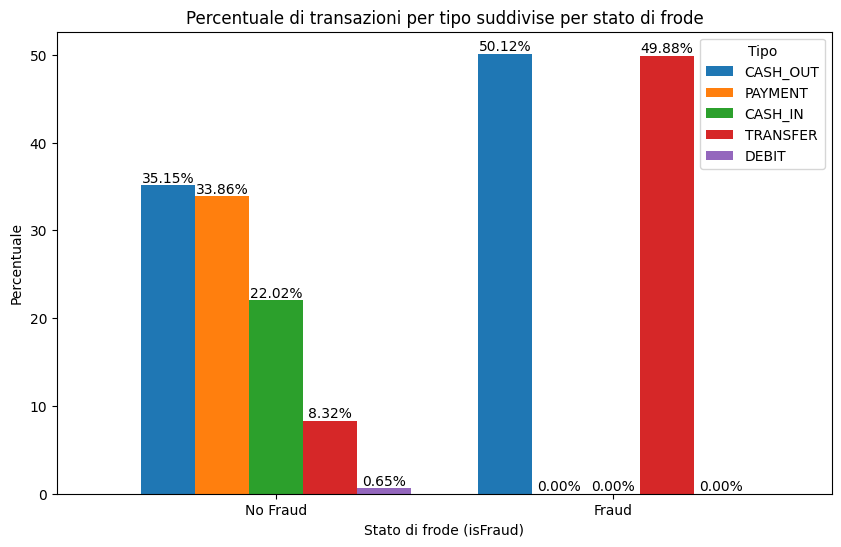

In [56]:

# Raggruppa i dati per "isFraud" e "type" e calcola il conteggio delle transazioni
grouped_data = df.groupby(["isFraud", "type"]).size().unstack()

# Calcola le percentuali per ogni tipo suddiviso per stato di frode
total_counts = grouped_data.sum(axis=1)
percentage_data = grouped_data.divide(total_counts, axis=0) * 100

# Crea un grafico a barre raggruppato
plt.figure(figsize=(10, 6))
ax = percentage_data.plot(kind="bar", width=0.8, figsize=(10, 6))
plt.title("Percentuale di transazioni per tipo suddivise per stato di frode")
plt.xlabel("Stato di frode (isFraud)")
plt.ylabel("Percentuale")
plt.xticks(rotation=0)
plt.legend(title="Tipo", labels=["CASH_OUT", "PAYMENT", "CASH_IN", "TRANSFER", "DEBIT"])

# Inserisci le percentuali sopra le barre
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Sostituisci le etichette dell'asse x
ax.set_xticklabels(["No Fraud", "Fraud"])

plt.show()


In [57]:
# Raggruppa i dati per "isFraud" e "type" e calcola il conteggio delle transazioni
grouped_data = df.groupby(["isFraud", "type"]).size().unstack()

# Calcola le percentuali per ogni tipo suddiviso per stato di frode
total_counts = grouped_data.sum(axis=1)
percentage_data = grouped_data.divide(total_counts, axis=0) * 100

# Sostituisci le etichette dell'asse x
percentage_data.index = ["No Fraud", "Fraud"]

# Aggiungi una colonna per i conteggi totali
total_counts = grouped_data.sum(axis=1)
percentage_data["Total"] = total_counts

# Riempire le celle con valori NaN con zeri
#percentage_data = percentage_data.fillna(0)

# Visualizza il DataFrame come una tabella con percentuali
print(percentage_data)

# Calcola e stampa le percentuali rispetto al totale
total_percentage = df["isFraud"].value_counts(normalize=True) * 100
print("\nPercentuale totale di Fraud e No Fraud:")
print(total_percentage)


type              1          2          3          4        5  Total
No Fraud  35.147009  33.858313  22.020686   8.321972  0.65202    NaN
Fraud     50.115670        NaN        NaN  49.884330      NaN    NaN

Percentuale totale di Fraud e No Fraud:
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


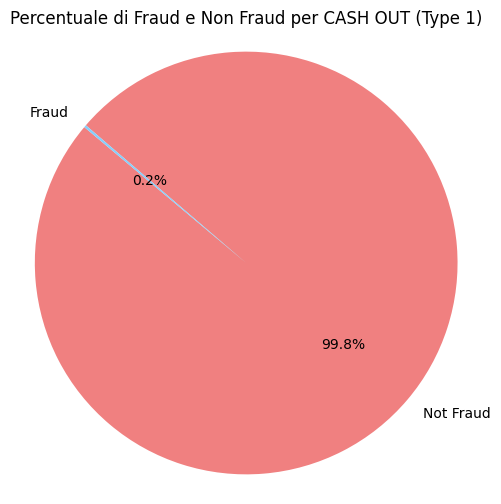

In [58]:
# Filtra il DataFrame per le transazioni di tipo "CASH OUT" (type 1)
cashout_data = df[df["type"] == 1]

# Calcola il conteggio di "isFraud" (Fraud e Non Fraud) per "CASH OUT"
fraud_counts = cashout_data["isFraud"].value_counts()

# Crea una lista di colori per il grafico a torta
colors = ["lightcoral", "lightskyblue"]

# Crea il grafico a torta
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=["Not Fraud", "Fraud"], colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Percentuale di Fraud e Non Fraud per CASH OUT (Type 1)")
plt.axis("equal")  # Rende il grafico a torta circolare
plt.show()


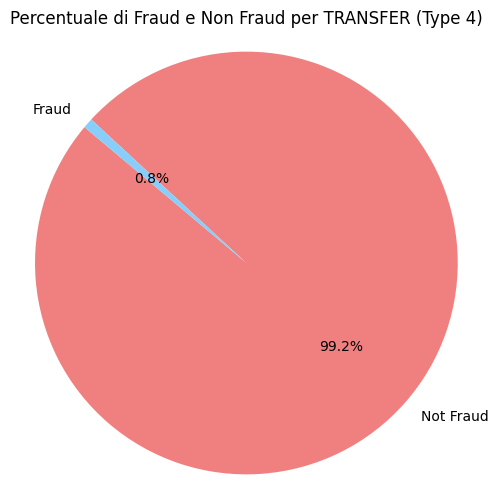

In [59]:
# Filtra il DataFrame per le transazioni di tipo "CASH OUT" (type 1)
cashout_data = df[df["type"] == 4]

# Calcola il conteggio di "isFraud" (Fraud e Non Fraud) per "CASH OUT"
fraud_counts = cashout_data["isFraud"].value_counts()

# Crea una lista di colori per il grafico a torta
colors = ["lightcoral", "lightskyblue"]

# Crea il grafico a torta
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=["Not Fraud", "Fraud"], colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Percentuale di Fraud e Non Fraud per TRANSFER (Type 4)")
plt.axis("equal")  # Rende il grafico a torta circolare
plt.show()


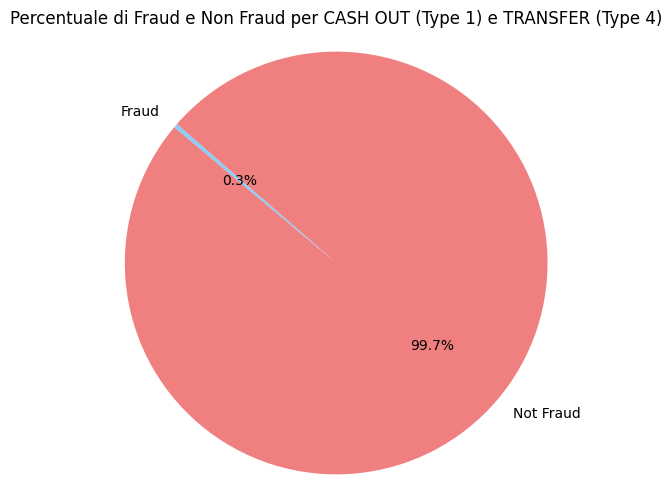

In [60]:

# Filtra il DataFrame per le transazioni di tipo "CASH OUT" (type 1) e "TRANSFER" (type 4)
filtered_data = df[(df["type"] == 1) | (df["type"] == 4)]

# Calcola il conteggio di "isFraud" (Fraud e Non Fraud) per le transazioni filtrate
fraud_counts = filtered_data["isFraud"].value_counts()

# Crea una lista di colori per il grafico a torta
colors = ["lightcoral", "lightskyblue"]

# Crea il grafico a torta
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=["Not Fraud", "Fraud"], colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Percentuale di Fraud e Non Fraud per CASH OUT (Type 1) e TRANSFER (Type 4)")
plt.axis("equal")  # Rende il grafico a torta circolare
plt.show()


In [61]:
# Filtra il DataFrame per le tipologie di "Type" 1 e 4 e isFraud uguale a 1
filtered_data = df[(df["type"].isin([1, 4])) & (df["isFraud"] == 1)]

# Conta quante transazioni soddisfano i criteri
count_fraud_transactions = len(filtered_data)

print("Numero di transazioni con isFraud=1 per le tipologie di Type 1 e 4:", count_fraud_transactions)


Numero di transazioni con isFraud=1 per le tipologie di Type 1 e 4: 8213


In [62]:
# Filtra il DataFrame per le transazioni con isFraud=1 (Fraud)
fraud_data = df[df["isFraud"] == 1]

# Raggruppa i dati filtrati per "Type" e calcola il conteggio totale di transazioni con Fraud=1
grouped_data = fraud_data.groupby("type")["isFraud"].count().reset_index()

# Calcola la percentuale di transazioni Fraud per ogni tipologia di Type
total_fraud_count = grouped_data["isFraud"].sum()
grouped_data["Percentuale Fraud"] = (grouped_data["isFraud"] / total_fraud_count) * 100

print(grouped_data)


   type  isFraud  Percentuale Fraud
0     1     4116           50.11567
1     4     4097           49.88433


Machine Learning 

In [63]:
# splitting the data

x = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df[["isFraud"]])

In [64]:
# training a machine learning model

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9997343861491021


Predizione del modello 

PREDIZIONE NOT FRAUD 

In [65]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[2,	11668.14, 41554.00,29885.86	]])
print(model.predict(features))

[0]


PREDIZIONE FRAUD

In [66]:
features = np.array([[1, 181, 181, 0]])
print(model.predict(features))

[1]


ERROR REGRESSION 

In [67]:
#elimino le due colonne che sono stringhe 
# Drop the two string columns
ln_df = df.drop(['nameOrig', 'nameDest'], axis=1)




In [68]:
## 1 - Declare Features and target
X = ln_df.drop(columns='type')
y = ln_df['isFraud']

In [69]:
## 2 -suddividere il problema in Training e Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 667
                                                    )

In [70]:
## 3 - Creare ed allenare il modello (fit) sulla parte di training
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
## 4 - creare la predizione sulla parte di TEST
y_pred = model.predict(X_test) #on Test set

In [72]:
## 5 -  Misurare l'errore del mio modello
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2score = r2_score(y_test, y_pred)
ad_r2score = 1-(1-r2score)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2_score: ', r2score)
print('Adjusted_R2_score: ', ad_r2score)

MAE:  5.733309729916835e-17
MSE:  1.8664521767376576e-32
RMSE:  1.3661816045964233e-16
R2_score:  1.0
Adjusted_R2_score:  1.0


MAE (Mean Absolute Error): La MAE è la media degli errori assoluti del modello, ovvero la media della differenza tra i valori preditti e i valori reali.
MSE (Mean Squared Error): La MSE è la media degli errori quadrati del modello, ovvero la media del quadrato della differenza tra i valori preditti e i valori reali.
RMSE (Root Mean Squared Error): La RMSE è la radice quadrata della MSE.
R2_score (R-squared): L'R2_score è una misura di quanto bene il modello spiega la varianza nei dati. Un R2_score pari a 1 indica che il modello spiega perfettamente la varianza nei dati. Un R2_score pari a 0 indica che il modello non spiega affatto la varianza nei dati.
Adjusted_R2_score (Adjusted R-squared): L'Adjusted_R2_score è una versione penalizzata dell'R2_score che tiene conto della complessità del modello.